In [1]:
import numpy as np
import pandas as pd
import pegasus as pg
import json
import os
import pegasusio
from pegasusio import UnimodalData, MultimodalData
import matplotlib.pyplot as plt
import xlrd

In [2]:
gene_region = pd.read_csv("/home/zihend1/scENCORE/SelectGenes/gene.regions.hg38.sorted.bed", sep="\t", names=["chr", "start", "end", "gene"])

In [3]:
bin_df = pd.read_csv("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/gap.blacklist.hg38.1000000.4col.autosomal.bed", sep='\t', names=["chr","start","end","name"])
delete_bins = np.load("/lv_scratch/scratch/share/scENCORE_brain/ZD_SS_ShareData/Cross-Sample/1000K_resolution/delete_bins.npy")
bin_df_new = bin_df.drop(delete_bins).reset_index(drop=True)

In [4]:
mdd_con = pg.read_input('/lv_scratch/scratch/share/mdd_con.zarr')
mdd_con.obs['condition_merge'] = mdd_con.obs['condition_merge'].cat.remove_unused_categories()
mdd_con

2022-08-03 13:19:47,346 - pegasusio.readwrite - INFO - zarr file '/lv_scratch/scratch/share/mdd_con.zarr' is loaded.
2022-08-03 13:19:47,347 - pegasusio.readwrite - INFO - Function 'read_input' finished in 1.26s.


MultimodalData object with 1 UnimodalData: 'GRCh38-rna'
    It currently binds to UnimodalData object GRCh38-rna

UnimodalData object with n_obs x n_vars = 51534 x 27951
    Genome: GRCh38; Modality: rna
    It contains 2 matrices: 'X', 'raw.X'
    It currently binds to matrix 'X' as X

    obs: 'n_genes', 'n_counts', 'Channel', 'percent_mito', 'scale', 'doublet', 'doublet_score', 'Group', 'leiden_labels', 'hodge_anno', 'lake_anno', 'nenad_anno', 'fine_clusters', 'subclass', 'condition_merge', 'AgeDeath', 'Sex', 'Smoking', 'Antidepressant', 'PMI', 'RIN', 'celltype'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'gmeans', 'gstds', 'means', 'partial_sum', 'de_res'
    uns: 'genome', 'modality', 'pca_features'

In [5]:
workbook = xlrd.open_workbook("/home/zihend1/scENCORE/SelectGenes/CON_MDD_Exc_from_A_to_B_data.xlsx")
table = workbook.sheets()[0]

In [6]:
switch_bins = []
for row in range(1, table.nrows):
    switch_bins.append(int(table.row_values(row)[1]))

In [7]:
i=0
all_genes = []
for switch_bin in switch_bins:
    i+=1
    bin_chr = bin_df_new.loc[switch_bin,"chr"]
    bin_start = bin_df_new.loc[switch_bin,"start"]
    bin_end = bin_df_new.loc[switch_bin,"end"]
    
    genes = gene_region[(gene_region.chr == bin_chr) & (gene_region.start>bin_start) & (gene_region.end<bin_end)].gene
    for gene in genes:
        print(gene, type(gene))
        all_genes.append(gene)
#     print(i, switch_bin, bin_chr, bin_start, bin_end)
#     for gene in genes:
#         if gene in mdd_con.var['featureid']:
#             fig = pg.violin(mdd_con,attrs=gene,groupby='celltype',hue='condition_merge',palette=['#F1A3AF','#6D678B'],return_fig=True)
#             plt.show()

RP11-739P1.3 <class 'str'>
RP11-616K6.1 <class 'str'>
ENPP6 <class 'str'>
RP11-162O12.1 <class 'str'>
RN7SL28P <class 'str'>
RP11-162O12.2 <class 'str'>
RP11-290F5.2 <class 'str'>
RP11-290F5.1 <class 'str'>
IRF2 <class 'str'>
RF00152 <class 'str'>
RP11-326I11.5 <class 'str'>
RP11-326I11.3 <class 'str'>
RP11-326I11.4 <class 'str'>
RP11-326I11.1 <class 'str'>
RP11-242J7.1 <class 'str'>
CASP3 <class 'str'>
PRIMPOL <class 'str'>
CENPU <class 'str'>
ACSL1 <class 'str'>
RP11-701P16.1 <class 'str'>
RP11-701P16.2 <class 'str'>
RP11-701P16.5 <class 'str'>
MIR3945 <class 'str'>
RP11-701P16.4 <class 'str'>
RP11-701P16.3 <class 'str'>
MIR4455 <class 'str'>
RP11-517M22.1 <class 'str'>
RP11-107N15.1 <class 'str'>
FZD7 <class 'str'>
KIAA2012 <class 'str'>
AC079354.3 <class 'str'>
AC079354.5 <class 'str'>
AC079354.2 <class 'str'>
AC079354.4 <class 'str'>
SUMO1 <class 'str'>
AC079354.6 <class 'str'>
NOP58 <class 'str'>
SNORD70 <class 'str'>
RF00575 <class 'str'>
SNORD11B <class 'str'>
SNORD11 <class 's

ZNF863P <class 'str'>
AC087073.1 <class 'str'>
AC139712.1 <class 'str'>
AC139712.4 <class 'str'>
AC139712.2 <class 'str'>
AC096583.1 <class 'str'>
MIR4431 <class 'str'>
AC010967.2 <class 'str'>
AC010967.3 <class 'str'>
AC010967.1 <class 'str'>
RP11-123O1.1 <class 'str'>
RNU6-832P <class 'str'>
RP11-3P22.1 <class 'str'>
RP11-3P22.2 <class 'str'>
RP11-666G4.2 <class 'str'>
RP11-666G4.1 <class 'str'>
RNU6-229P <class 'str'>
RP5-942I16.1 <class 'str'>
AC079112.1 <class 'str'>
C1D <class 'str'>
RP11-474G23.4 <class 'str'>
WDR92 <class 'str'>
AC017083.2 <class 'str'>
RP11-474G23.1 <class 'str'>
PNO1 <class 'str'>
PPP3R1 <class 'str'>
RP11-474G23.2 <class 'str'>
RP11-474G23.3 <class 'str'>
CNRIP1 <class 'str'>
AC015969.3 <class 'str'>
PLEK <class 'str'>
AC127383.1 <class 'str'>
FBXO48 <class 'str'>
APLF <class 'str'>
AC130709.1 <class 'str'>
PROKR1 <class 'str'>
ARHGAP25 <class 'str'>
AC097495.2 <class 'str'>
AC097495.3 <class 'str'>
BMP10 <class 'str'>
GKN3P <class 'str'>
GKN2 <class 'str'>


AC019129.1 <class 'str'>
RNU6-566P <class 'str'>
AC019129.2 <class 'str'>
RP11-559M23.1 <class 'str'>
PPM1B <class 'str'>
AC013717.3 <class 'str'>
SLC3A1 <class 'str'>
PREPL <class 'str'>
CAMKMT <class 'str'>
RP11-89K21.1 <class 'str'>
RP11-89K21.2 <class 'str'>
RF02246 <class 'str'>
RF02247 <class 'str'>
RF02248 <class 'str'>
RF02249 <class 'str'>
RF02250 <class 'str'>
RF02251 <class 'str'>
RF02252 <class 'str'>
SIX3-AS1 <class 'str'>
SIX3 <class 'str'>
AC012354.6 <class 'str'>
AC012354.8 <class 'str'>
AC096554.1 <class 'str'>
AC068535.1 <class 'str'>
AC068535.2 <class 'str'>
AC068535.3 <class 'str'>
AC013402.2 <class 'str'>
AC068535.4 <class 'str'>
AC013402.4 <class 'str'>
AC013402.3 <class 'str'>
AC013402.5 <class 'str'>
AC068535.5 <class 'str'>
AC068057.1 <class 'str'>
CTD-2015C24.1 <class 'str'>
AC068057.2 <class 'str'>
AC068057.3 <class 'str'>
AC018730.1 <class 'str'>
RP11-13J10.1 <class 'str'>
POU3F3 <class 'str'>
AC018730.4 <class 'str'>
AC018730.3 <class 'str'>
AC012494.1 <cla

FAM196A <class 'str'>
NPS <class 'str'>
RP11-288A5.2 <class 'str'>
FOXI2 <class 'str'>
RP11-31A20.1 <class 'str'>
CLRN3 <class 'str'>
RP11-4C20.3 <class 'str'>
RP11-4C20.4 <class 'str'>
AC016735.1 <class 'str'>
AC016735.2 <class 'str'>
AC016735.3 <class 'str'>
RNU6-242P <class 'str'>
AC093609.1 <class 'str'>
ZFP36L2 <class 'str'>
LINC01126 <class 'str'>
AC010883.5 <class 'str'>
THADA <class 'str'>
RNU6-958P <class 'str'>
RN7SL531P <class 'str'>
PLEKHH2 <class 'str'>
C1GALT1C1L <class 'str'>
AC011242.5 <class 'str'>
RN7SKP66 <class 'str'>
DYNC2LI1 <class 'str'>
ABCG5 <class 'str'>
ABCG8 <class 'str'>
LRPPRC <class 'str'>
RNU6-1048P <class 'str'>
RN7SL455P <class 'str'>
RNA5SP260 <class 'str'>
CTD-2647L4.4 <class 'str'>
CTD-2647L4.5 <class 'str'>
KIF13B <class 'str'>
CTD-2647L4.1 <class 'str'>
CTD-2563K22.1 <class 'str'>
DUSP4 <class 'str'>
RP4-676L2.1 <class 'str'>
RP11-486M23.1 <class 'str'>
RP11-486M23.2 <class 'str'>
RP11-486M23.3 <class 'str'>
RPL17P33 <class 'str'>
C8orf75 <class '

AC003973.4 <class 'str'>
AC003973.5 <class 'str'>
ZNF257 <class 'str'>
BNIP3P29 <class 'str'>
ZNF92P2 <class 'str'>
RP11-157B13.1 <class 'str'>
PCGF7P <class 'str'>
RP11-157B13.3 <class 'str'>
VN1R85P <class 'str'>
ZNF676 <class 'str'>
RP11-157B13.6 <class 'str'>
RP11-157B13.10 <class 'str'>
RP11-157B13.7 <class 'str'>
RP11-157B13.8 <class 'str'>
ZNF729 <class 'str'>
RP11-157B13.9 <class 'str'>
CTB-31C7.3 <class 'str'>
RPL34P34 <class 'str'>
ZNF98 <class 'str'>
AC011516.1 <class 'str'>
AC025811.2 <class 'str'>
AC025811.3 <class 'str'>
AC025811.1 <class 'str'>
ZNF209P <class 'str'>
AC004004.2 <class 'str'>
CTC-457E21.1 <class 'str'>
CTC-457E21.2 <class 'str'>
RNU6-1179P <class 'str'>
CTC-457E21.10 <class 'str'>
CTC-457E21.3 <class 'str'>
RN7SL860P <class 'str'>
CTC-457E21.6 <class 'str'>
CTC-457E21.5 <class 'str'>
CTC-457E21.4 <class 'str'>
AC011516.2 <class 'str'>
CTC-457E21.7 <class 'str'>
ZNF492 <class 'str'>
CTC-457E21.9 <class 'str'>
ZNF849P <class 'str'>
RPL34P33 <class 'str'>
CTC

PRDX3 <class 'str'>
GRK5 <class 'str'>
RP11-567J24.4 <class 'str'>
RN7SL749P <class 'str'>
RP11-79M19.2 <class 'str'>
MIR4681 <class 'str'>
RGS10 <class 'str'>
RP11-179H18.8 <class 'str'>
TIAL1 <class 'str'>
RP11-179H18.4 <class 'str'>
RP11-179H18.5 <class 'str'>
BAG3 <class 'str'>
RP11-179H18.7 <class 'str'>
INPP5F <class 'str'>
RN7SL846P <class 'str'>
RP11-359E7.2 <class 'str'>
RP11-359E7.3 <class 'str'>
MCMBP <class 'str'>
SEC23IP <class 'str'>
MIR4682 <class 'str'>
RP11-198M6.2 <class 'str'>
LAPTM4A <class 'str'>
RP11-644K8.1 <class 'str'>
AC098828.2 <class 'str'>
AC098828.3 <class 'str'>
RN7SL140P <class 'str'>
RNU6-961P <class 'str'>
SDC1 <class 'str'>
AC007041.2 <class 'str'>
RNU7-113P <class 'str'>
PUM2 <class 'str'>
AC007041.3 <class 'str'>
RNA5SP86 <class 'str'>
RHOB <class 'str'>
AC023137.2 <class 'str'>
AC012065.4 <class 'str'>
RP11-130L8.3 <class 'str'>
HS1BP3 <class 'str'>
RP11-130L8.2 <class 'str'>
AC012065.6 <class 'str'>
AC012065.5 <class 'str'>
GDF7 <class 'str'>
RP11

AC017078.1 <class 'str'>
AC017006.2 <class 'str'>
AC017006.3 <class 'str'>
AC016696.1 <class 'str'>
EPAS1 <class 'str'>
AC016912.3 <class 'str'>
AC018682.7 <class 'str'>
AC018682.8 <class 'str'>
RN7SL817P <class 'str'>
TMEM247 <class 'str'>
ATP6V1E2 <class 'str'>
RP11-417F21.2 <class 'str'>
RHOQ <class 'str'>
RP11-417F21.1 <class 'str'>
PIGF <class 'str'>
CRIPT <class 'str'>
RP11-536C12.1 <class 'str'>
SOCS5 <class 'str'>
RP11-333I13.1 <class 'str'>
AC016722.1 <class 'str'>
AC016722.2 <class 'str'>
AC016722.3 <class 'str'>
AC016722.4 <class 'str'>
MCFD2 <class 'str'>
RP11-15I20.1 <class 'str'>
TNFRSF10B <class 'str'>
RP11-875O11.2 <class 'str'>
RP11-875O11.3 <class 'str'>
RP11-875O11.5 <class 'str'>
RP11-875O11.4 <class 'str'>
TNFRSF10C <class 'str'>
TNFRSF10D <class 'str'>
RP11-1149O23.2 <class 'str'>
TNFRSF10A <class 'str'>
RP11-1149O23.1 <class 'str'>
RP11-1149O23.3 <class 'str'>
RP11-1149O23.4 <class 'str'>
CHMP7 <class 'str'>
R3HCC1 <class 'str'>
LOXL2 <class 'str'>
RP11-177H13.2 

In [8]:
down_deg = pd.read_csv("/home/zihend1/scENCORE/Data/MDD_vs_CON/Exc_DOWN_DEG.csv", sep=",")

In [9]:
down_deg.rename(columns = {'Unnamed: 0':'gene'}, inplace = True)

In [10]:
down_deg

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,AC119673.2,0.000000e+00,-1.332394,0.085,0.310,0.000000e+00
1,PDE5A,0.000000e+00,-1.052338,0.630,0.895,0.000000e+00
2,FAM66A,0.000000e+00,-1.622468,0.005,0.280,0.000000e+00
3,LINC00551,5.869193e-279,-0.839475,0.226,0.507,8.564914e-275
4,AC010503.1,3.691643e-223,-1.301182,0.061,0.229,5.387214e-219
...,...,...,...,...,...,...
612,AL109930.1,4.101688e-17,-0.414973,0.232,0.289,5.985593e-13
613,GPC5,1.284789e-13,-0.386149,0.341,0.399,1.874893e-09
614,AL355672.1,2.563154e-13,-0.457429,0.069,0.099,3.740410e-09
615,AC016687.2,9.875265e-13,-0.450964,0.116,0.153,1.441097e-08


In [11]:
data = down_deg

In [12]:
select_genes = pd.Series(list(set(data.gene).intersection(set(all_genes))))

In [13]:
select_genes

0           NBAS
1          OPRM1
2         CC2D2A
3     AC010975.1
4        ST8SIA3
5        C1QTNF7
6         CFAP61
7          MTMR7
8         SLC3A1
9          ATAD2
10     CERS6-AS1
11         IQCA1
12      AASDHPPT
13        ZNF423
14    AC007098.1
15          GGCX
16    AC007563.2
17    AC023590.1
18        ZNF365
19        NAP1L5
dtype: object

AASDHPPT
         gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
270  AASDHPPT  3.883714e-68   -0.324642  0.445   0.62  5.667503e-64


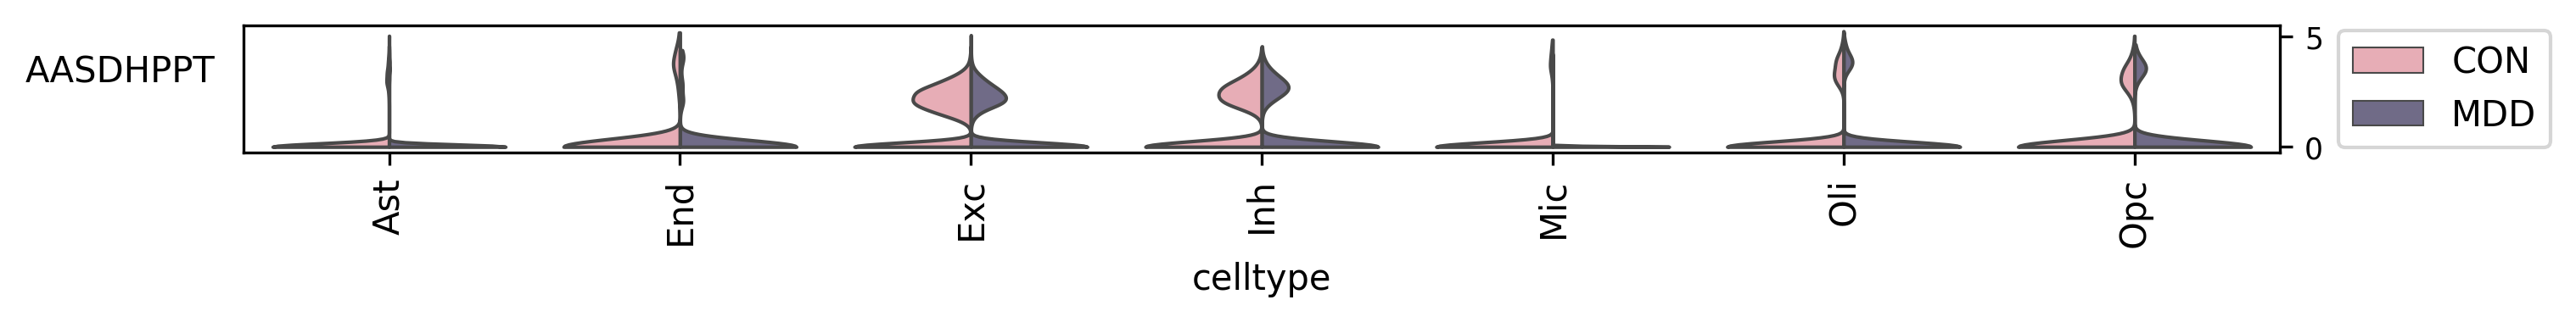

OPRM1
      gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
483  OPRM1  3.368465e-49   -0.292777  0.536  0.666  4.915601e-45


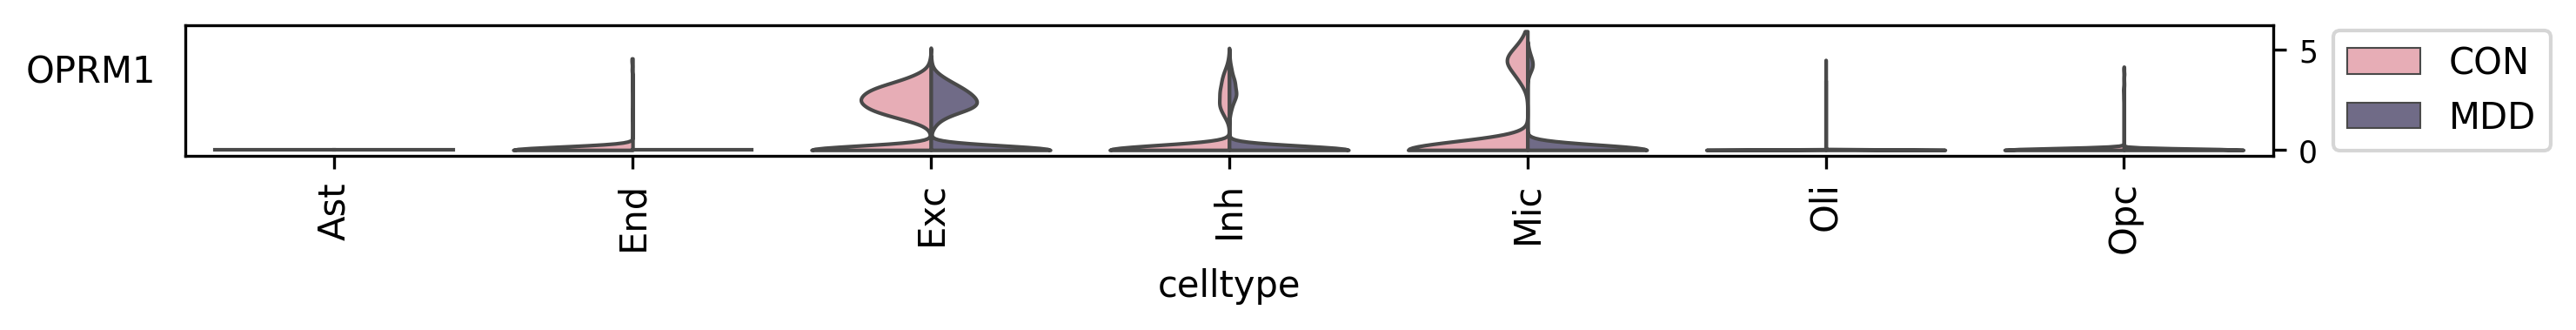

MTMR7
      gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
214  MTMR7  1.145605e-75   -0.295136  0.674  0.817  1.671782e-71


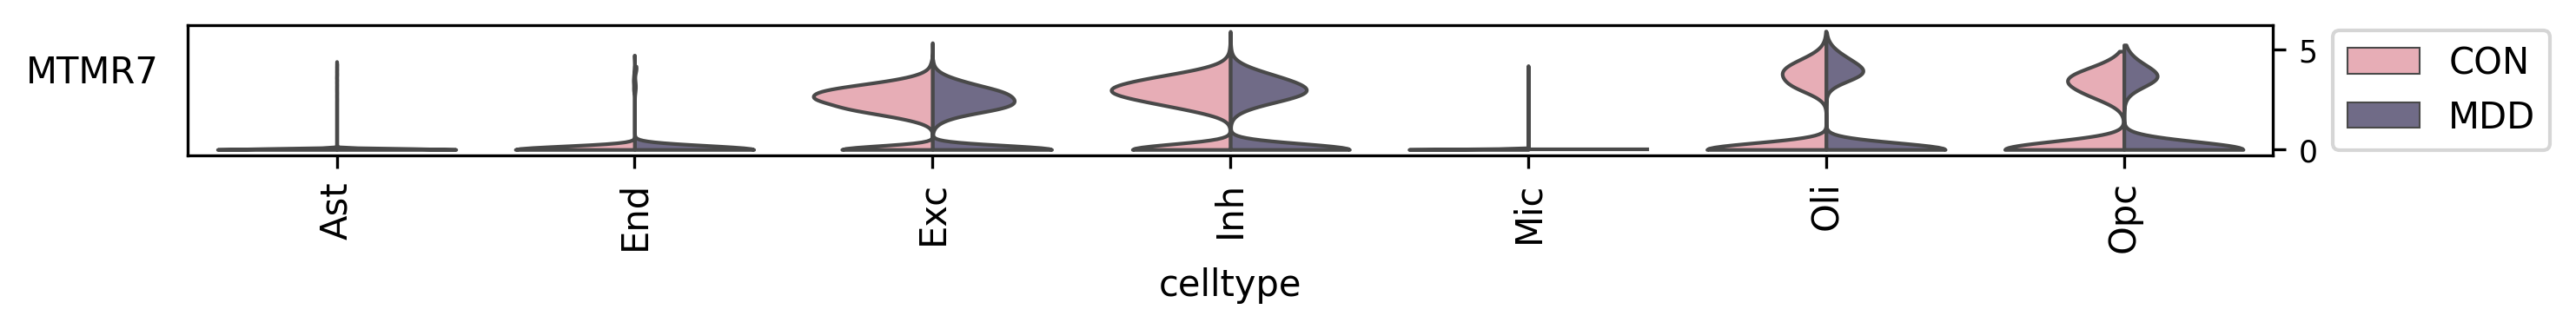

C1QTNF7
        gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
565  C1QTNF7  2.250401e-34   -0.278425  0.061  0.115  3.284010e-30


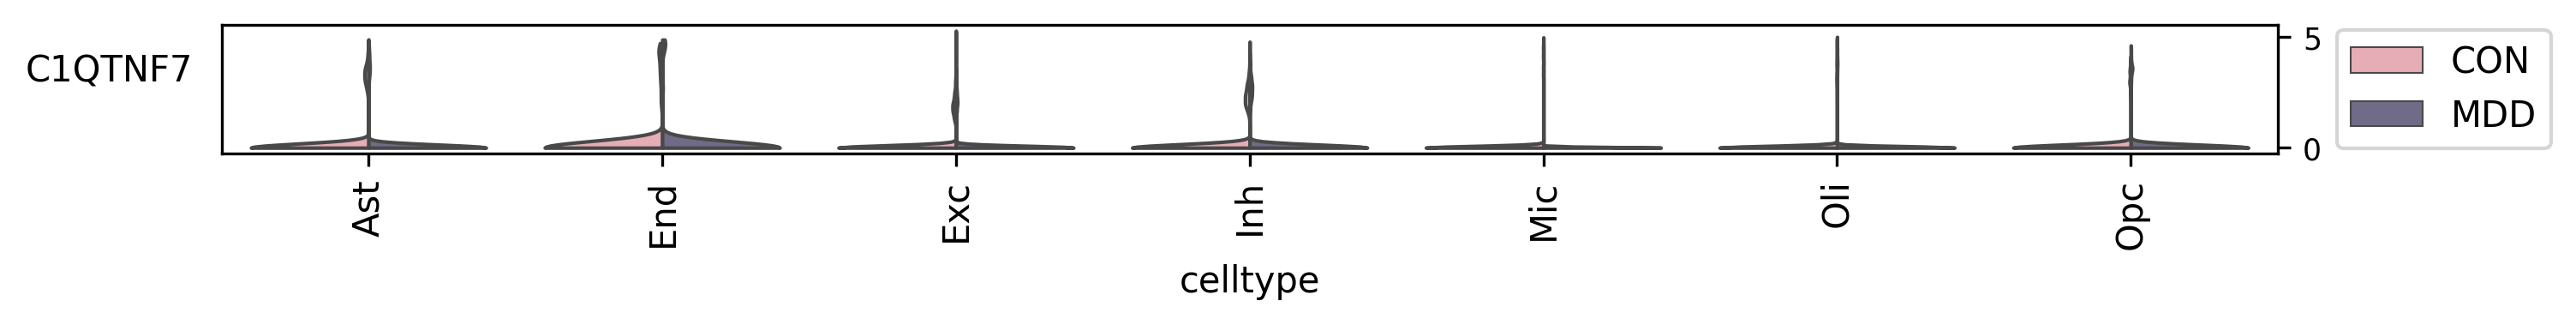

AC007563.2
           gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
387  AC007563.2  1.253867e-57   -0.378729  0.644   0.74  1.829769e-53


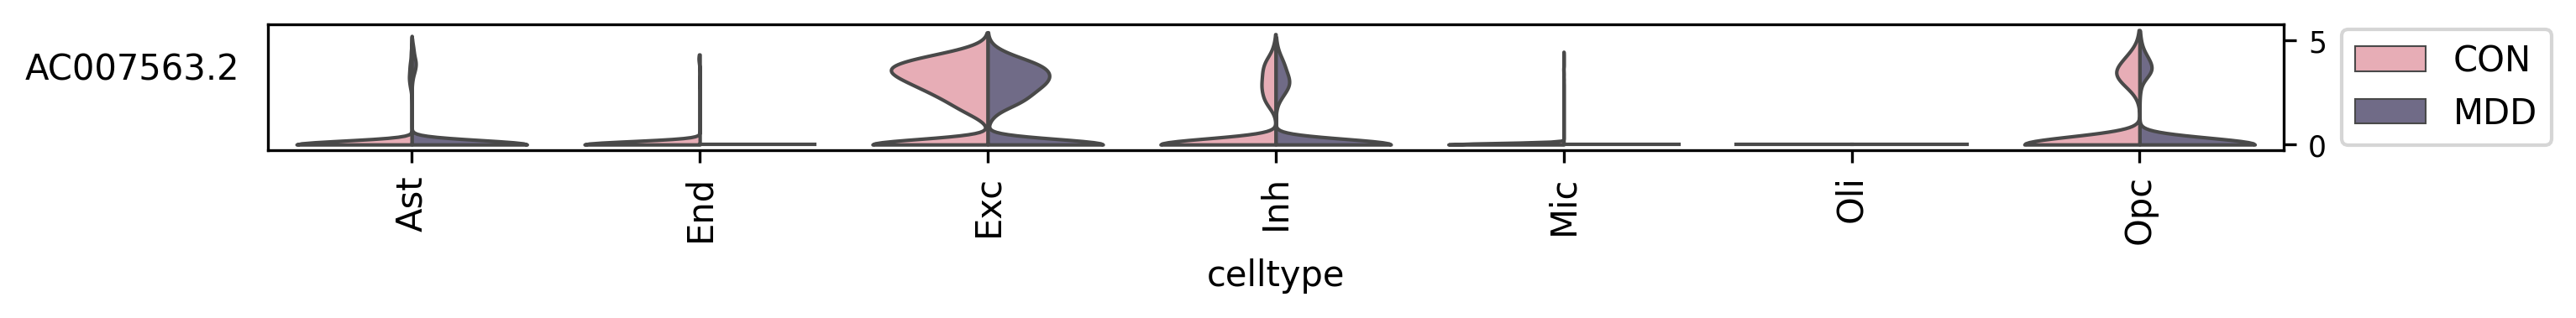

GGCX
     gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
172  GGCX  7.479545e-82    -0.32657  0.359  0.541  1.091490e-77


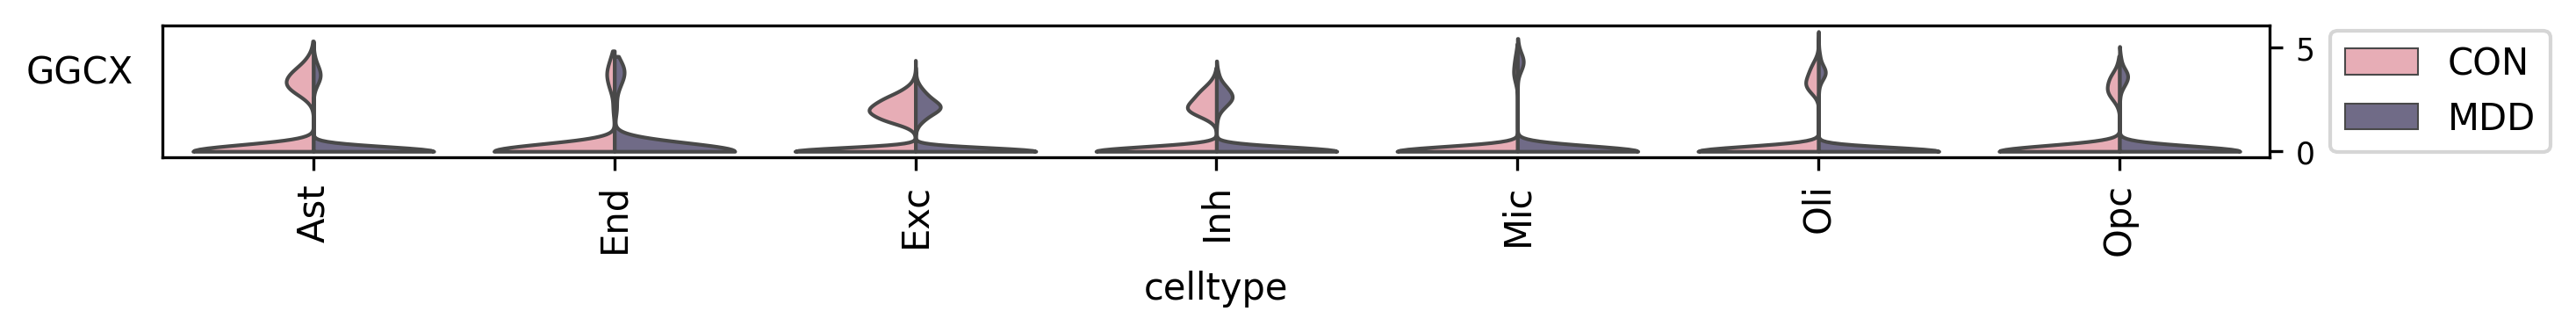

ATAD2
      gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
259  ATAD2  1.879792e-69   -0.313908  0.314  0.477  2.743180e-65


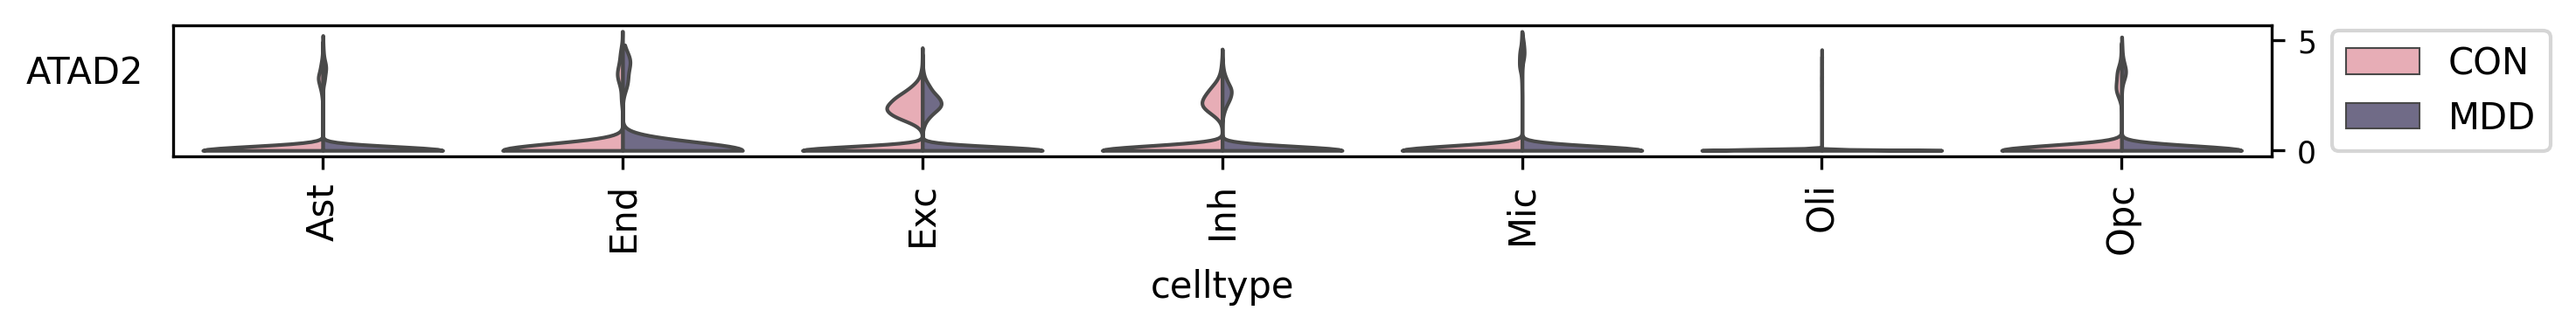

ZNF365
      gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
69  ZNF365  1.991679e-117   -0.447318  0.624    0.8  2.906458e-113


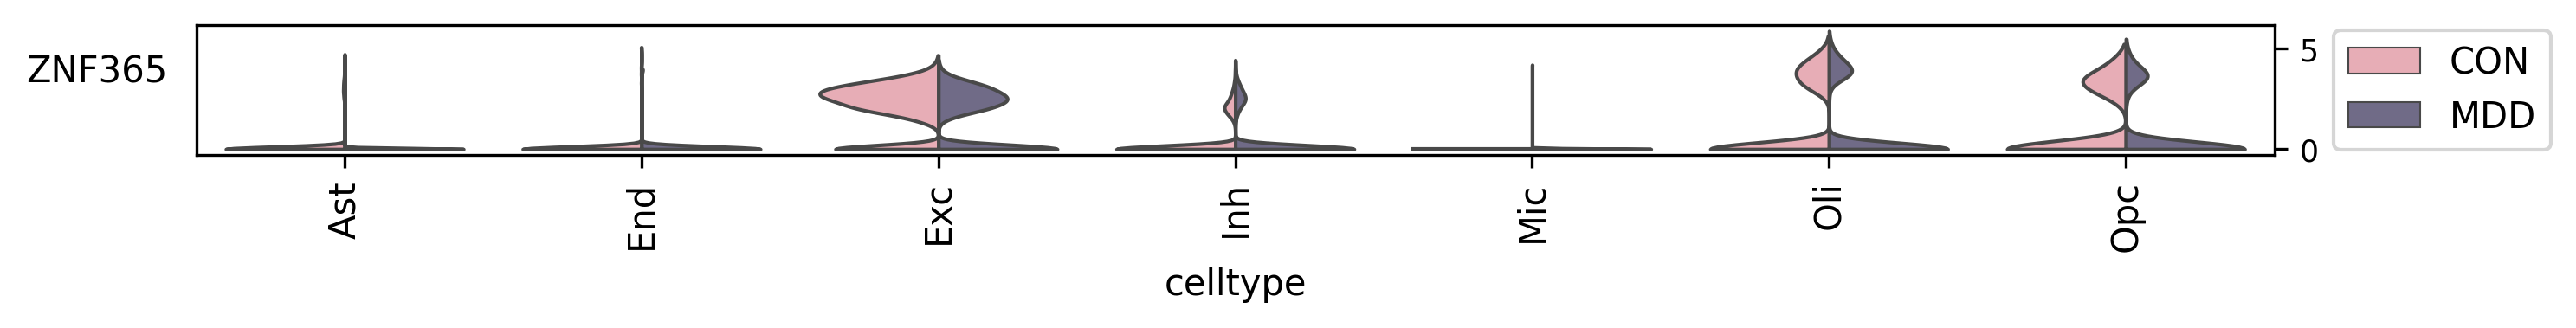

CC2D2A
       gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
450  CC2D2A  3.949106e-52   -0.272924  0.353  0.502  5.762930e-48


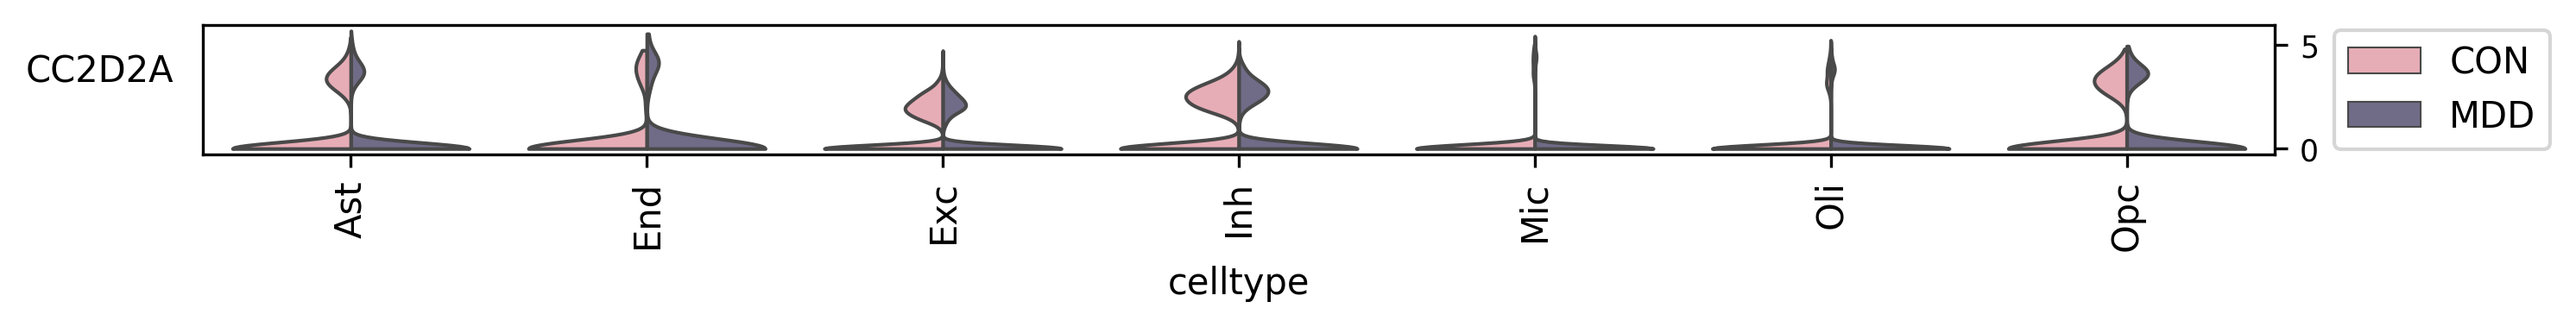

ZNF423
       gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
410  ZNF423  1.713756e-55   -0.323986  0.124  0.222  2.500884e-51


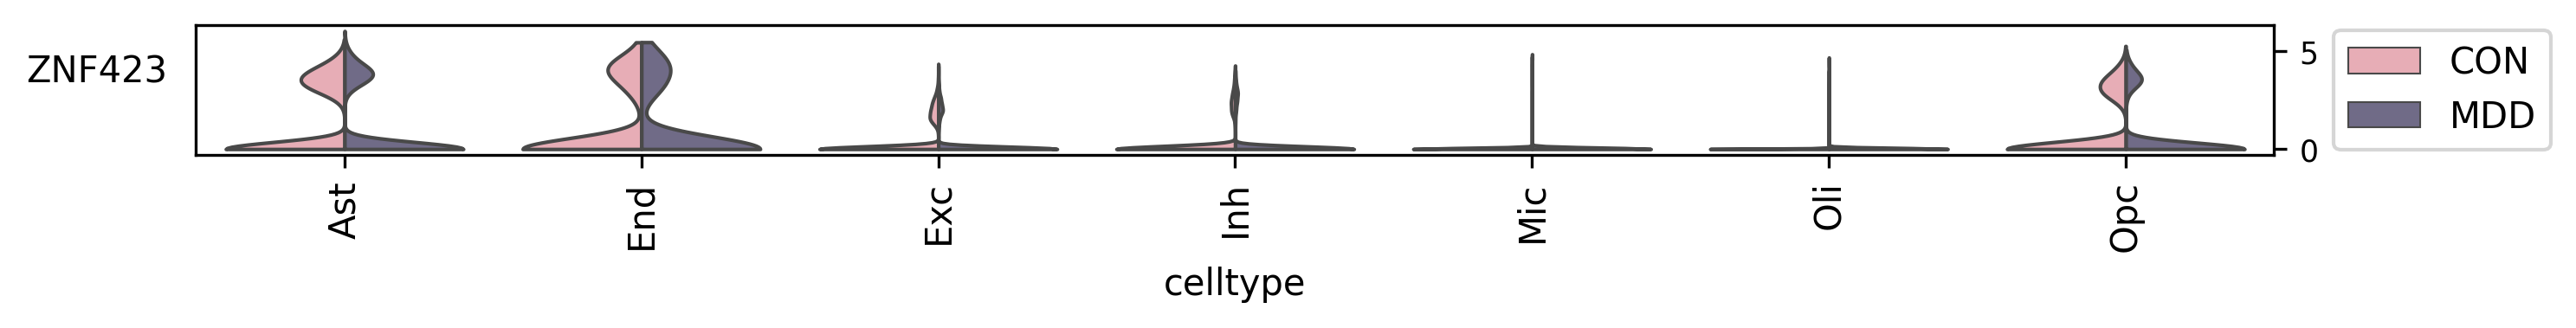

AC010975.1
           gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
590  AC010975.1  6.572018e-27   -0.272926  0.101  0.159  9.590546e-23


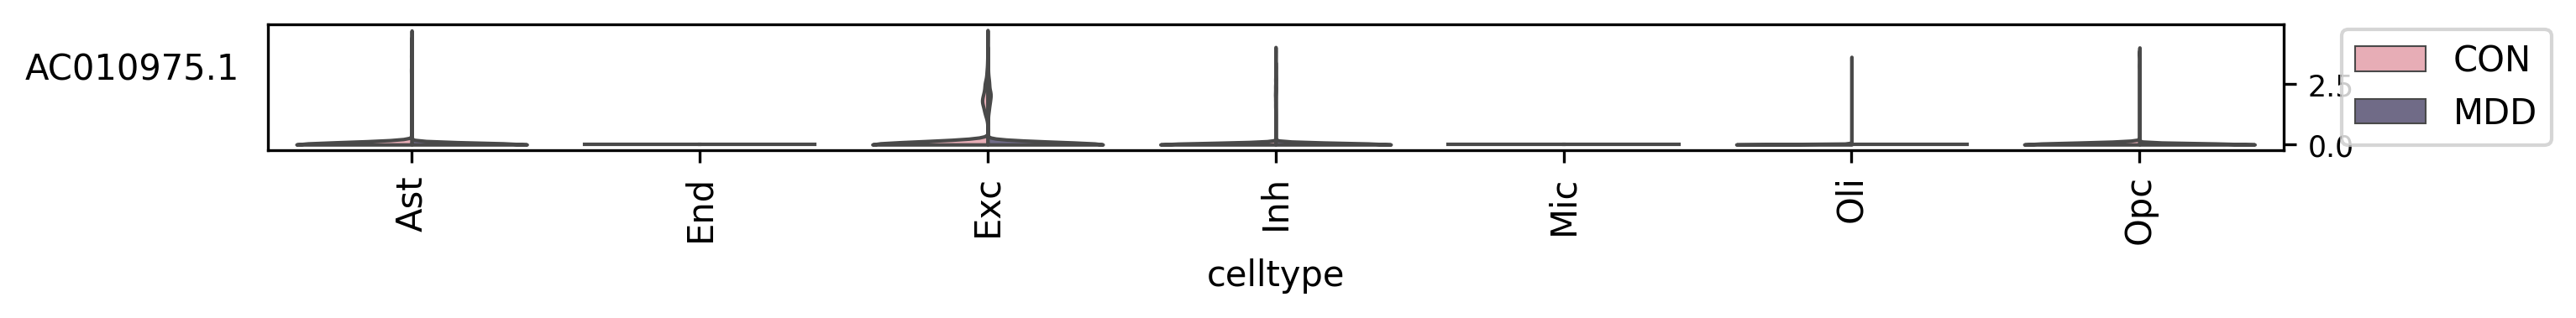

NBAS
    gene          p_val  avg_log2FC  pct.1  pct.2      p_val_adj
80  NBAS  3.573453e-111    -0.31601  0.895   0.94  5.214740e-107


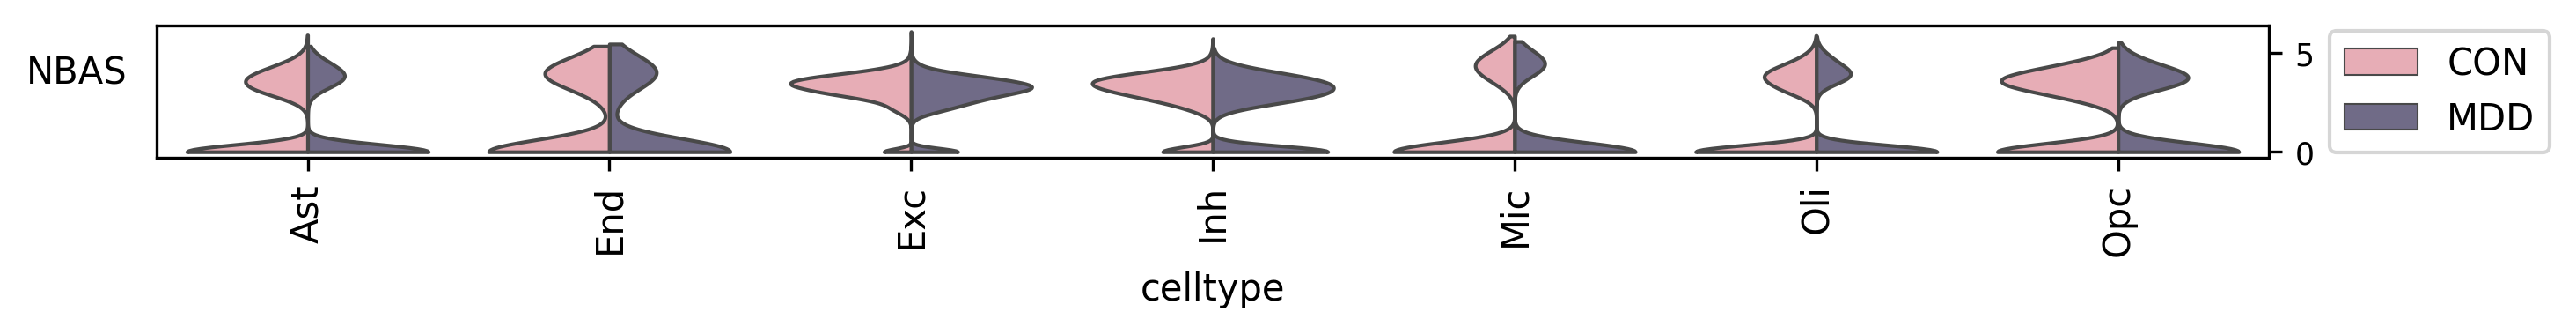

AC023590.1
          gene          p_val  avg_log2FC  pct.1  pct.2     p_val_adj
94  AC023590.1  1.448658e-103   -0.411509  0.687  0.829  2.114027e-99


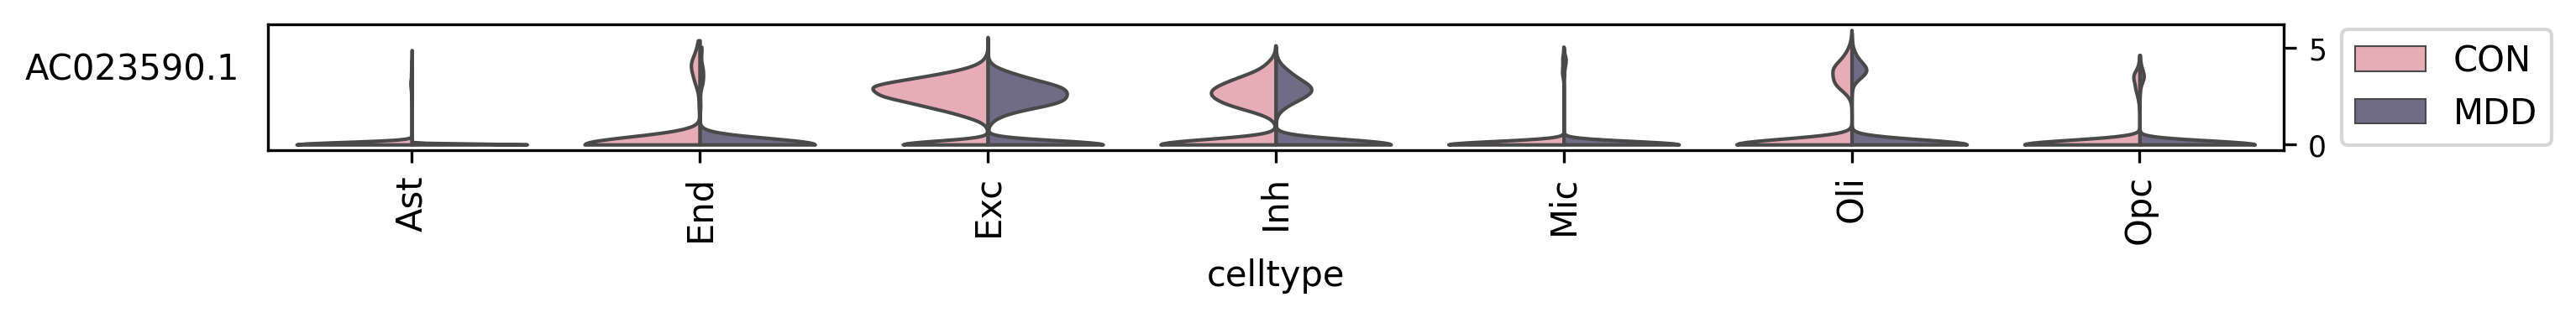

CFAP61
       gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
146  CFAP61  3.222493e-88   -0.426641  0.374  0.542  4.702584e-84


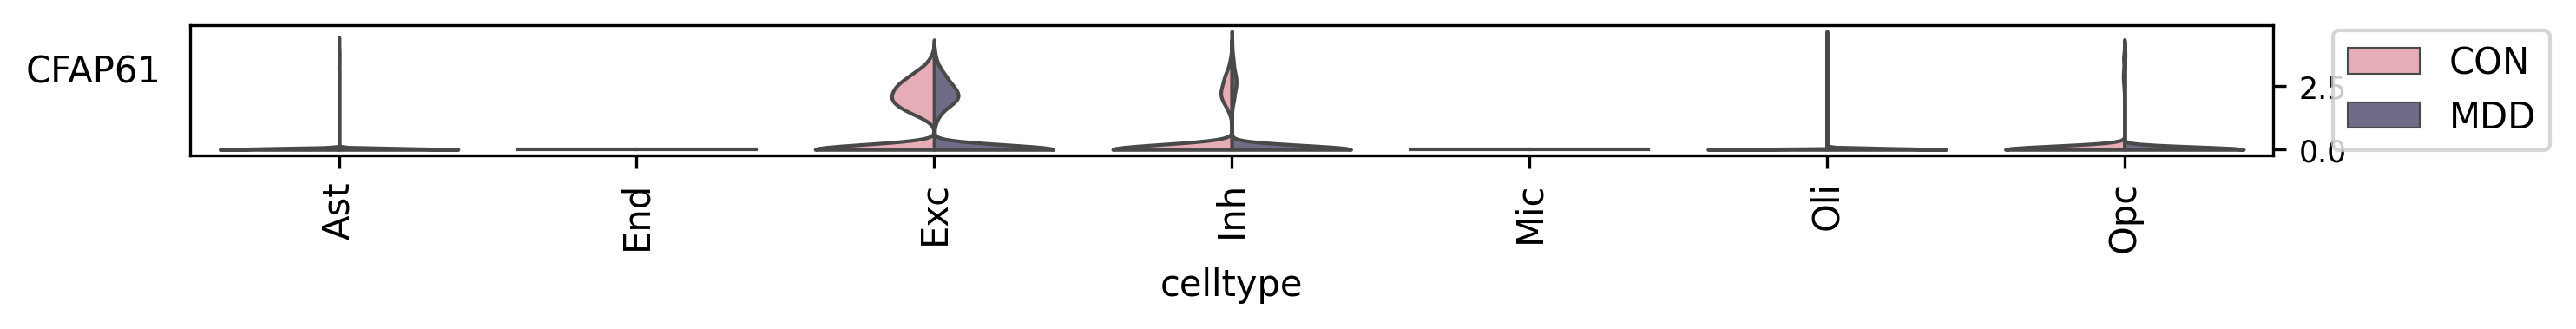

AC007098.1
           gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
174  AC007098.1  1.698912e-81   -0.369496  0.462  0.638  2.479222e-77


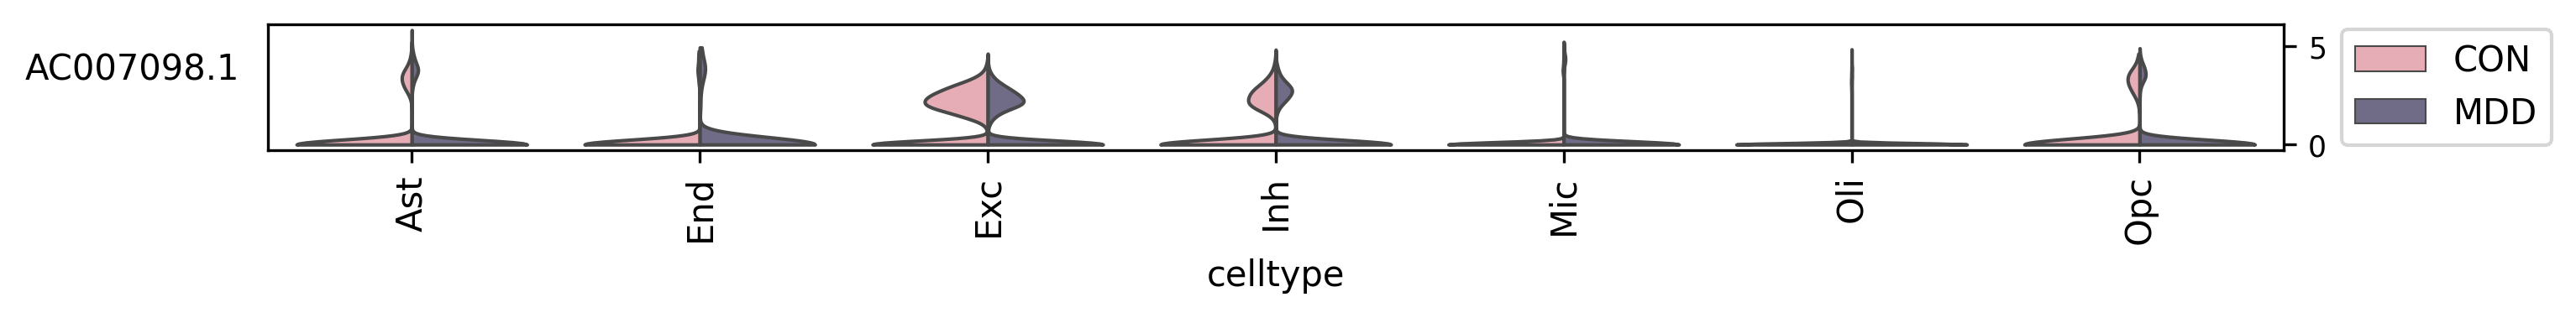

IQCA1
      gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
408  IQCA1  5.948922e-56   -0.285181  0.375  0.524  8.681262e-52


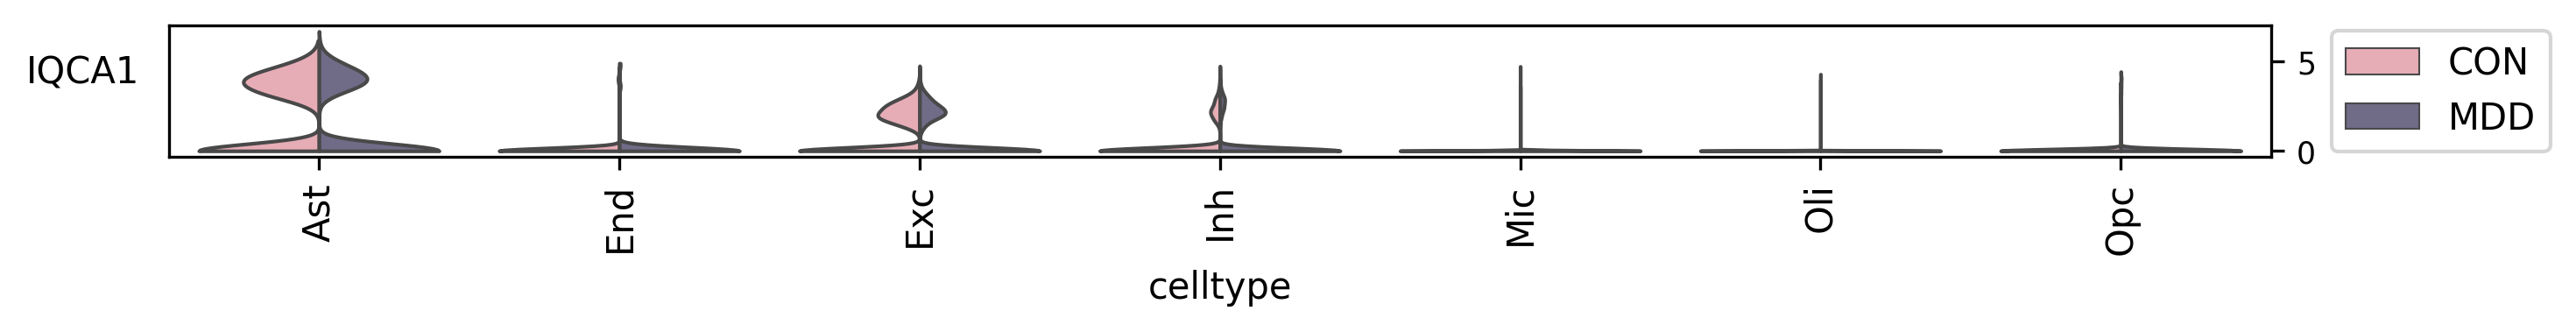

ST8SIA3
        gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
281  ST8SIA3  4.316256e-67   -0.321193  0.674  0.822  6.298712e-63


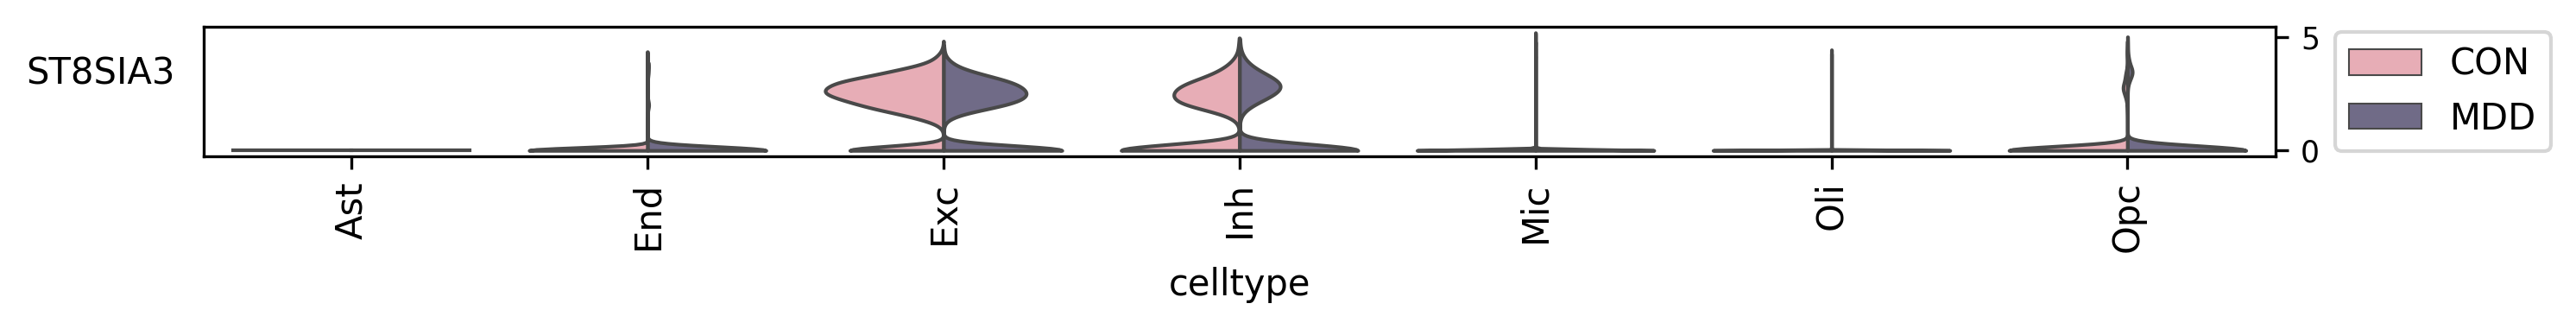

CERS6-AS1
          gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
278  CERS6-AS1  3.032430e-67   -0.399984  0.027  0.089  4.425225e-63


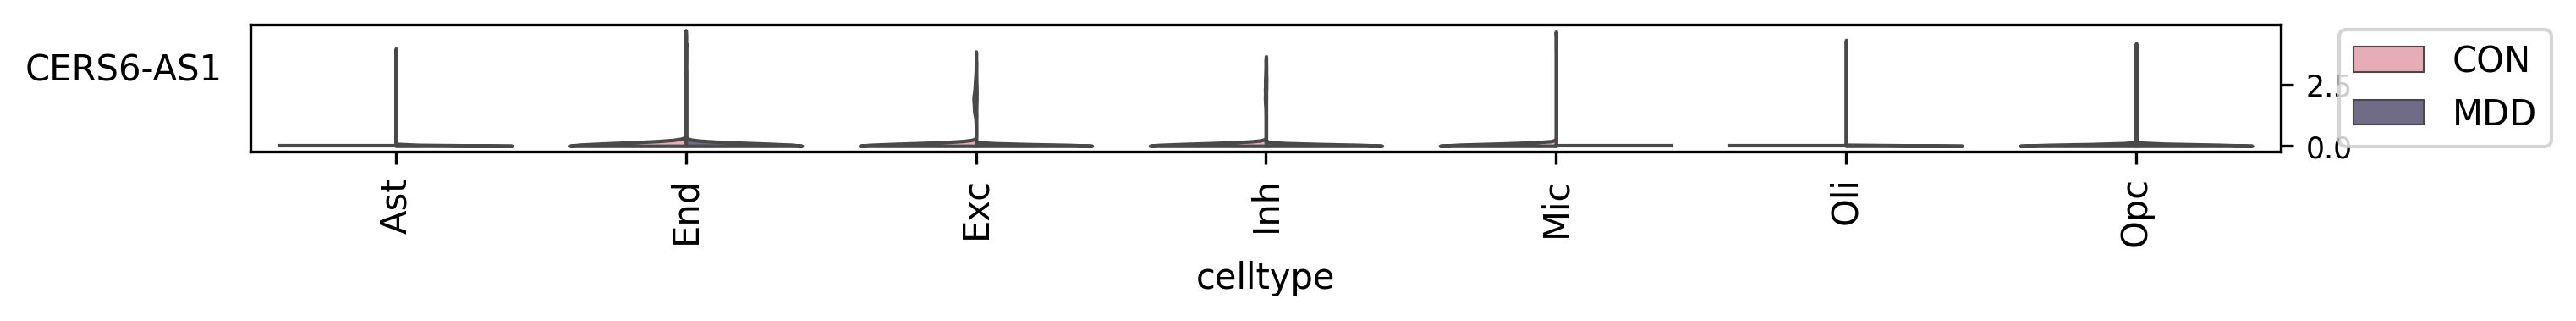

SLC3A1
       gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
363  SLC3A1  1.509932e-59   -0.302749   0.34  0.495  2.203443e-55


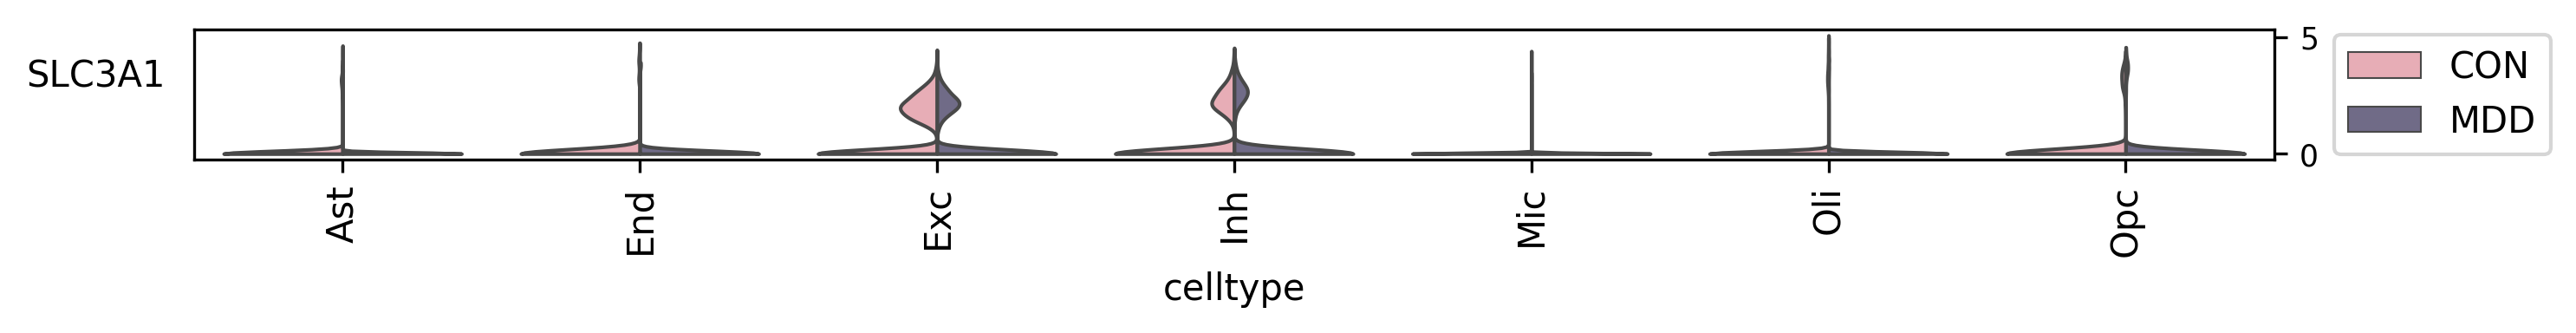

NAP1L5
       gene         p_val  avg_log2FC  pct.1  pct.2     p_val_adj
251  NAP1L5  2.000416e-70   -0.376065  0.163  0.289  2.919207e-66


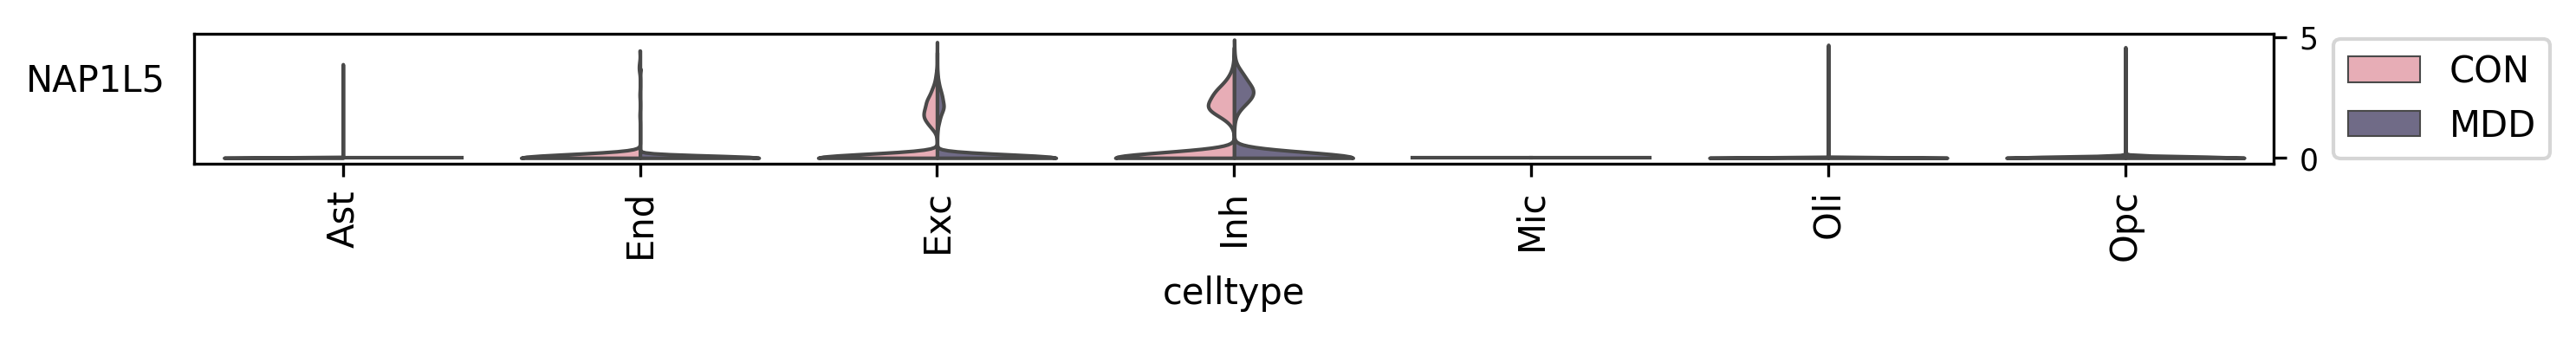

In [15]:
for gene in select_genes:
    print(gene)
    print(down_deg[down_deg.gene==gene])
    fig = pg.violin(mdd_con,attrs=gene,groupby='celltype',hue='condition_merge',palette=['#F1A3AF','#6D678B'],return_fig=True)
    plt.show()

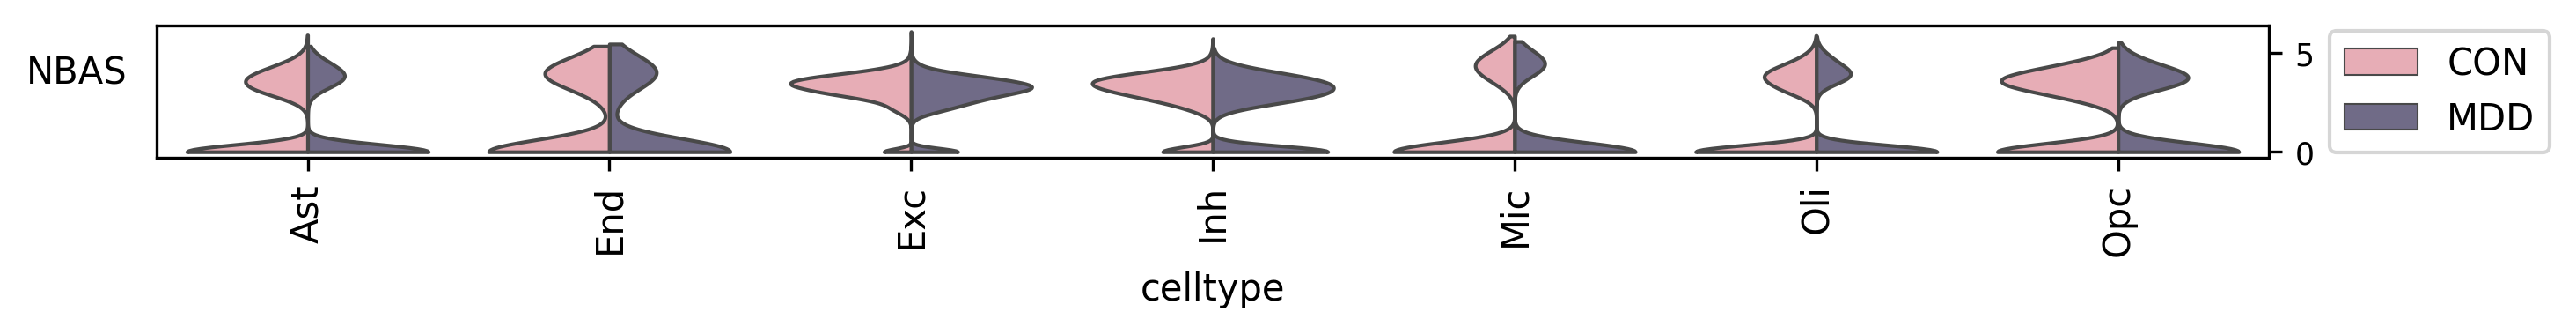

In [14]:
fig = pg.violin(mdd_con,attrs="NBAS",groupby='celltype',hue='condition_merge',palette=['#F1A3AF','#6D678B'],return_fig=True)

In [16]:
fig.savefig("Figure6/violin_NBAS.eps", format="eps", dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [38]:
i=0
for switch_bin in switch_bins:
    i+=1
    bin_chr = bin_df_new.loc[switch_bin,"chr"]
    bin_start = bin_df_new.loc[switch_bin,"start"]
    bin_end = bin_df_new.loc[switch_bin,"end"]
    
    genes = gene_region[(gene_region.chr == bin_chr) & (gene_region.start>bin_start) & (gene_region.end<bin_end)].gene
    for gene in genes:
        if gene=="CFAP61":
            print(i, switch_bin, bin_chr, bin_start, bin_end)

53 2230 chr20 20000000 21000000


In [30]:
bulk_mdd_degs = pd.read_csv("/home/zihend1/scENCORE/Data/bulk_mdd_degs.csv",sep=" ")

In [23]:
bulk_mdd_degs[bulk_mdd_degs.Genename=="AC007563.2"]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Geneid,Genename


In [31]:
bulk_mdd_degs[bulk_mdd_degs.Genename=="ZNF365"]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Geneid,Genename
6516,2286.300457,0.017453,0.042918,0.406666,0.684253,0.868714,ENSG00000138311,ZNF365


In [ ]:
bulk_mdd_degs[bulk_mdd_degs.Genename=="ZNF365"]